# Performance of hybrid augmentations modes

## Import libraries and download dataset

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Performance of 50% Random Substitute, 50% Synonym (Total 100%)

In [3]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 0.5,          # 50% of data for random augmentation
    MODE.SYNONYM.WORDNET: 0.5,         # 50% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 100% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 100% augmentation: 17052


### RNN Max Pooling

In [4]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_augmented.train_model(n_epochs=10)

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.93it/s]


Epoch: 1/10
Train Loss: 0.636, Train Acc: 0.665
Valid Loss: 0.574, Valid Acc: 0.739


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


Epoch: 2/10
Train Loss: 0.547, Train Acc: 0.764
Valid Loss: 0.533, Valid Acc: 0.771


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.78it/s]


Epoch: 3/10
Train Loss: 0.501, Train Acc: 0.810
Valid Loss: 0.510, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.40it/s]


Epoch: 4/10
Train Loss: 0.472, Train Acc: 0.843
Valid Loss: 0.495, Valid Acc: 0.813


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]


Epoch: 5/10
Train Loss: 0.448, Train Acc: 0.869
Valid Loss: 0.489, Valid Acc: 0.819


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.02it/s]


Epoch: 6/10
Train Loss: 0.430, Train Acc: 0.887
Valid Loss: 0.481, Valid Acc: 0.827


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.09it/s]


Epoch: 7/10
Train Loss: 0.412, Train Acc: 0.905
Valid Loss: 0.476, Valid Acc: 0.832


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.95it/s]


Epoch: 8/10
Train Loss: 0.401, Train Acc: 0.917
Valid Loss: 0.474, Valid Acc: 0.835


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.77it/s]


Epoch: 9/10
Train Loss: 0.395, Train Acc: 0.922
Valid Loss: 0.474, Valid Acc: 0.834


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.95it/s]

Epoch: 10/10
Train Loss: 0.386, Train Acc: 0.929
Valid Loss: 0.463, Valid Acc: 0.847


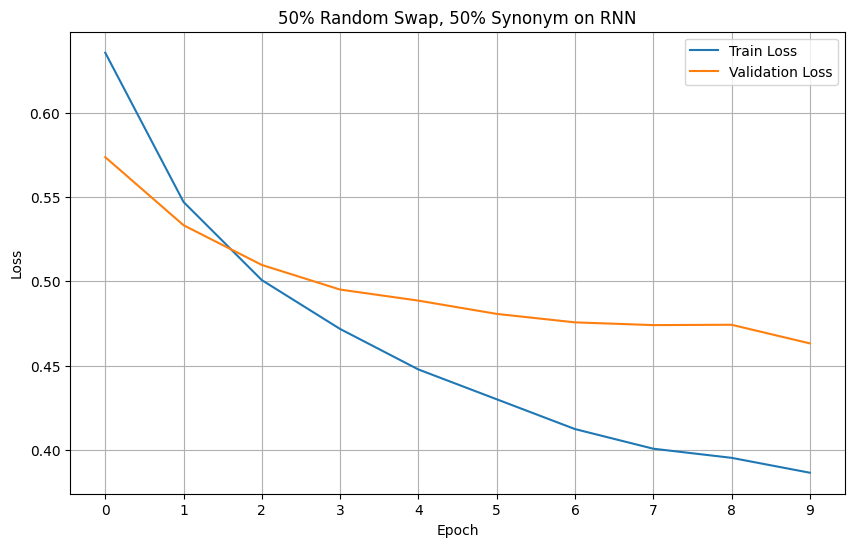

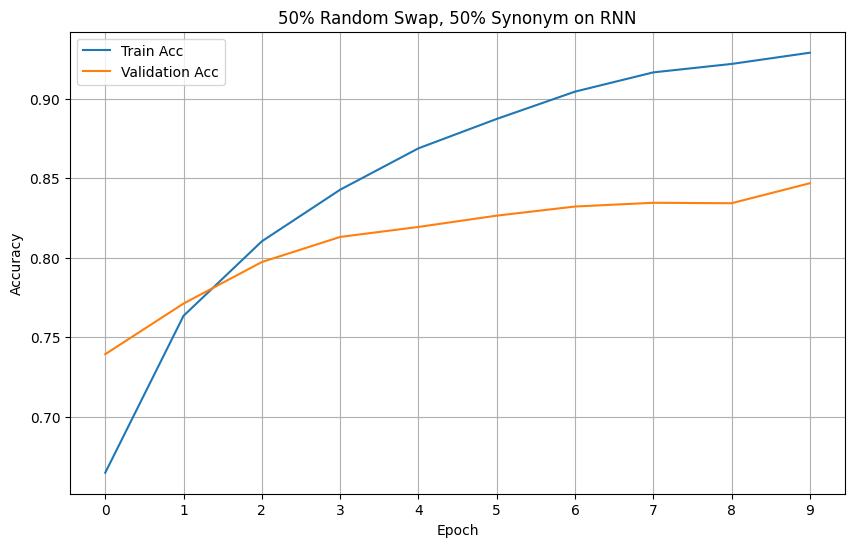

In [5]:
# Plot the loss graph
pipeline_augmented.plot_loss(title="50% Random Swap, 50% Synonym on RNN")
pipeline_augmented.plot_acc(title="50% Random Swap, 50% Synonym on RNN")

### LSTM

In [6]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_augmented_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13641 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.45it/s]


Epoch: 1/10
Train Loss: 0.650, Train Acc: 0.619
Valid Loss: 0.565, Valid Acc: 0.744


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]


Epoch: 2/10
Train Loss: 0.540, Train Acc: 0.763
Valid Loss: 0.526, Valid Acc: 0.775


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


Epoch: 3/10
Train Loss: 0.500, Train Acc: 0.806
Valid Loss: 0.516, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch: 4/10
Train Loss: 0.484, Train Acc: 0.823
Valid Loss: 0.513, Valid Acc: 0.790


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]


Epoch: 5/10
Train Loss: 0.457, Train Acc: 0.853
Valid Loss: 0.491, Valid Acc: 0.816


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]


Epoch: 6/10
Train Loss: 0.440, Train Acc: 0.870
Valid Loss: 0.492, Valid Acc: 0.816


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


Epoch: 7/10
Train Loss: 0.426, Train Acc: 0.886
Valid Loss: 0.481, Valid Acc: 0.828


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]


Epoch: 8/10
Train Loss: 0.423, Train Acc: 0.890
Valid Loss: 0.490, Valid Acc: 0.819


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]


Epoch: 9/10
Train Loss: 0.423, Train Acc: 0.890
Valid Loss: 0.482, Valid Acc: 0.829


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.49it/s]

Epoch: 10/10
Train Loss: 0.425, Train Acc: 0.888
Valid Loss: 0.518, Valid Acc: 0.793


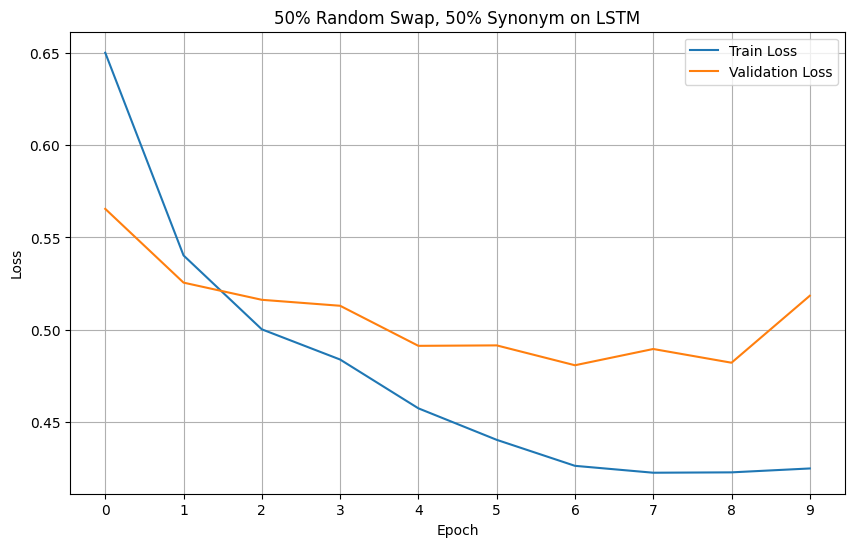

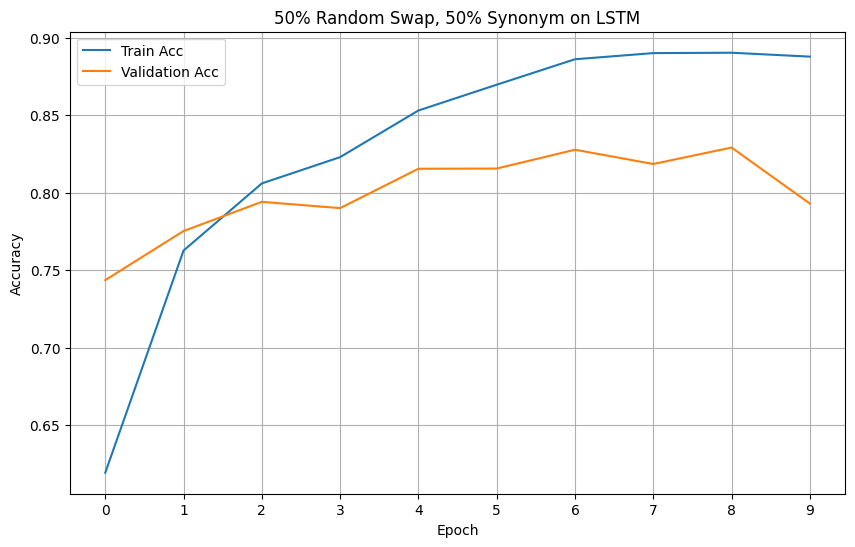

In [7]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss(title="50% Random Swap, 50% Synonym on LSTM")
pipeline_augmented_LSTM.plot_acc(title="50% Random Swap, 50% Synonym on LSTM")

____

## Performance of 75% Random Substitute, 25% Synonym (Total 100%)

In [8]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 0.75,          # 75% of data for random augmentation
    MODE.SYNONYM.WORDNET: 0.25,         # 25% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 100% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 100% augmentation: 17053


### RNN Max Pooling

In [9]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_augmented.train_model(n_epochs=10)

Map:   0%|          | 0/17053 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13642 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.71it/s]


Epoch: 1/10
Train Loss: 0.643, Train Acc: 0.658
Valid Loss: 0.573, Valid Acc: 0.741


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.67it/s]


Epoch: 2/10
Train Loss: 0.547, Train Acc: 0.761
Valid Loss: 0.539, Valid Acc: 0.765


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.73it/s]


Epoch: 3/10
Train Loss: 0.506, Train Acc: 0.803
Valid Loss: 0.516, Valid Acc: 0.795


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.56it/s]


Epoch: 4/10
Train Loss: 0.477, Train Acc: 0.837
Valid Loss: 0.519, Valid Acc: 0.782


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.62it/s]


Epoch: 5/10
Train Loss: 0.453, Train Acc: 0.863
Valid Loss: 0.487, Valid Acc: 0.825


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.68it/s]


Epoch: 6/10
Train Loss: 0.429, Train Acc: 0.888
Valid Loss: 0.478, Valid Acc: 0.827


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


Epoch: 7/10
Train Loss: 0.411, Train Acc: 0.906
Valid Loss: 0.472, Valid Acc: 0.839


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.39it/s]


Epoch: 8/10
Train Loss: 0.402, Train Acc: 0.915
Valid Loss: 0.476, Valid Acc: 0.832


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.58it/s]


Epoch: 9/10
Train Loss: 0.395, Train Acc: 0.922
Valid Loss: 0.462, Valid Acc: 0.849


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.75it/s]

Epoch: 10/10
Train Loss: 0.389, Train Acc: 0.929
Valid Loss: 0.461, Valid Acc: 0.848


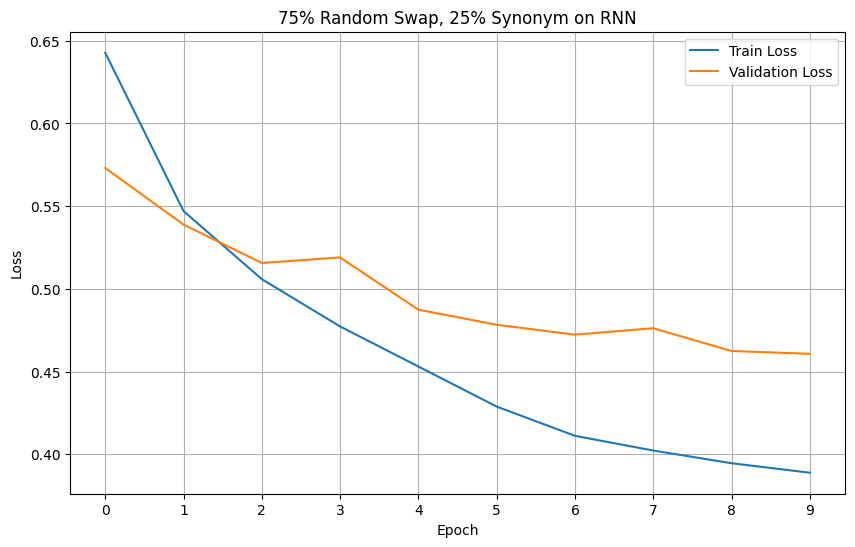

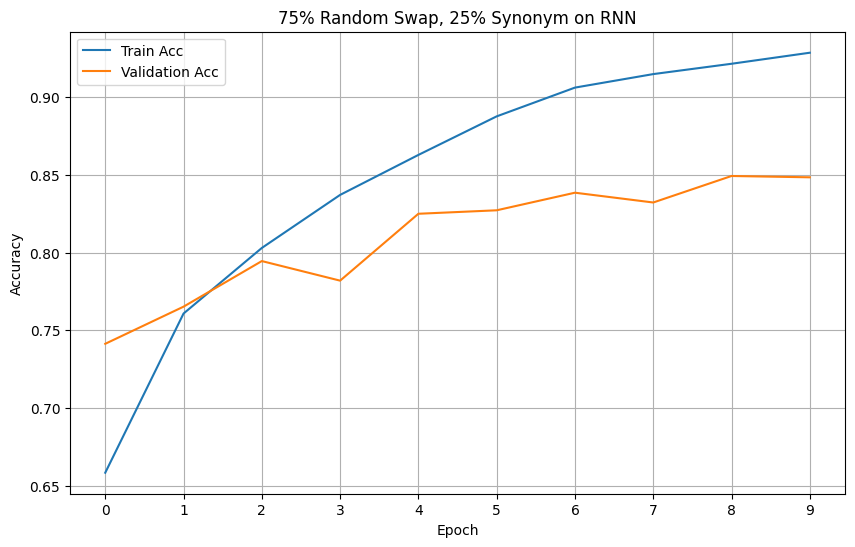

In [10]:
# Plot the loss graph
pipeline_augmented.plot_loss(title="75% Random Swap, 25% Synonym on RNN")
pipeline_augmented.plot_acc(title="75% Random Swap, 25% Synonym on RNN")

### LSTM

In [11]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_augmented_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/17053 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13642 [00:00<?, ? examples/s]

Map:   0%|          | 0/3411 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


Epoch: 1/10
Train Loss: 0.658, Train Acc: 0.625
Valid Loss: 0.593, Valid Acc: 0.709


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


Epoch: 2/10
Train Loss: 0.554, Train Acc: 0.750
Valid Loss: 0.545, Valid Acc: 0.751


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]


Epoch: 3/10
Train Loss: 0.508, Train Acc: 0.799
Valid Loss: 0.527, Valid Acc: 0.777


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]


Epoch: 4/10
Train Loss: 0.476, Train Acc: 0.833
Valid Loss: 0.508, Valid Acc: 0.797


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]


Epoch: 5/10
Train Loss: 0.449, Train Acc: 0.863
Valid Loss: 0.503, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


Epoch: 6/10
Train Loss: 0.437, Train Acc: 0.874
Valid Loss: 0.483, Valid Acc: 0.826


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


Epoch: 7/10
Train Loss: 0.422, Train Acc: 0.890
Valid Loss: 0.486, Valid Acc: 0.824


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]


Epoch: 8/10
Train Loss: 0.412, Train Acc: 0.901
Valid Loss: 0.479, Valid Acc: 0.831


evaluating...: 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]


Epoch: 9/10
Train Loss: 0.406, Train Acc: 0.908
Valid Loss: 0.477, Valid Acc: 0.834


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

Epoch: 10/10
Train Loss: 0.406, Train Acc: 0.907
Valid Loss: 0.488, Valid Acc: 0.823


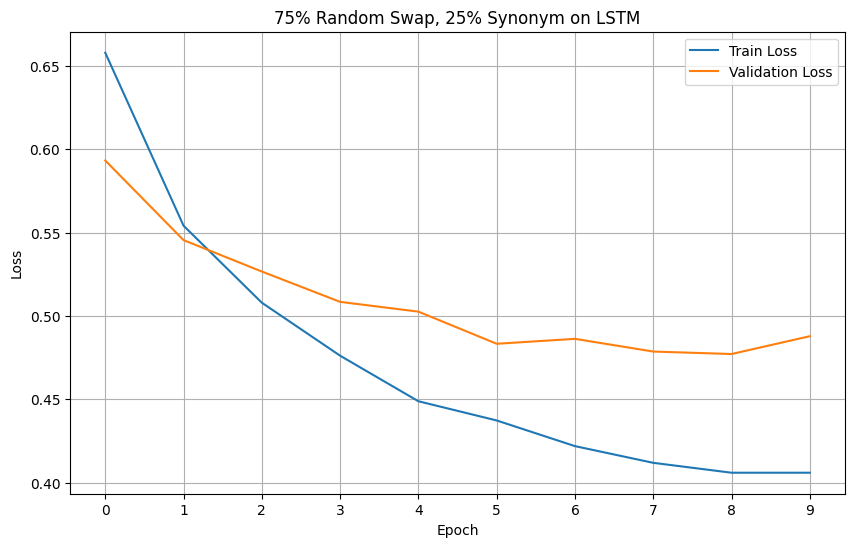

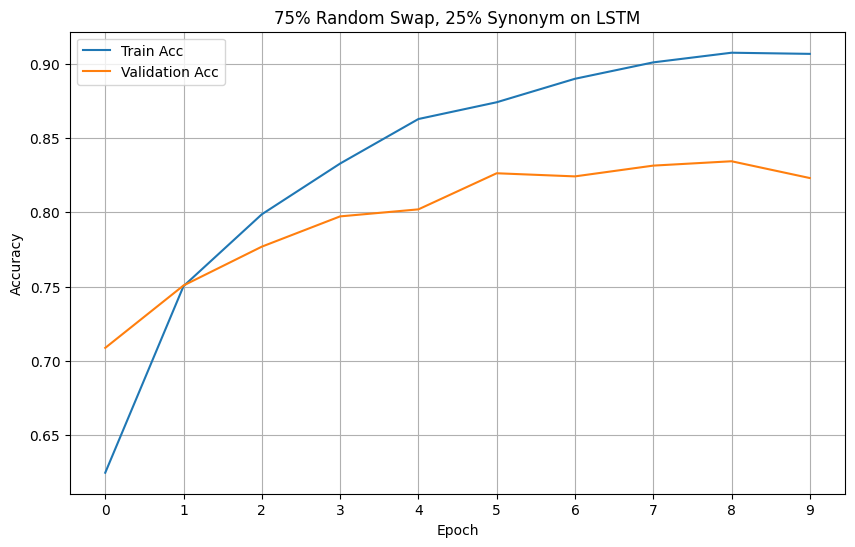

In [12]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss(title="75% Random Swap, 25% Synonym on LSTM")
pipeline_augmented_LSTM.plot_acc(title="75% Random Swap, 25% Synonym on LSTM")

____

## Performance of 25% Random Substitute, 75% Synonym (Total 100%)

In [13]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 0.25,          # 25% of data for random augmentation
    MODE.SYNONYM.WORDNET: 0.75,         # 75% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 100% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 100% augmentation: 17050


### RNN Max Pooling

In [14]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_augmented.train_model(n_epochs=10)

Map:   0%|          | 0/17050 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13640 [00:00<?, ? examples/s]

Map:   0%|          | 0/3410 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.35it/s]


Epoch: 1/10
Train Loss: 0.649, Train Acc: 0.636
Valid Loss: 0.587, Valid Acc: 0.720


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


Epoch: 2/10
Train Loss: 0.563, Train Acc: 0.748
Valid Loss: 0.548, Valid Acc: 0.761


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.53it/s]


Epoch: 3/10
Train Loss: 0.515, Train Acc: 0.799
Valid Loss: 0.522, Valid Acc: 0.788


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.42it/s]


Epoch: 4/10
Train Loss: 0.484, Train Acc: 0.832
Valid Loss: 0.505, Valid Acc: 0.802


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.29it/s]


Epoch: 5/10
Train Loss: 0.457, Train Acc: 0.859
Valid Loss: 0.510, Valid Acc: 0.794


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.19it/s]


Epoch: 6/10
Train Loss: 0.441, Train Acc: 0.876
Valid Loss: 0.494, Valid Acc: 0.813


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.28it/s]


Epoch: 7/10
Train Loss: 0.420, Train Acc: 0.898
Valid Loss: 0.485, Valid Acc: 0.826


evaluating...: 100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


Epoch: 8/10
Train Loss: 0.405, Train Acc: 0.913
Valid Loss: 0.485, Valid Acc: 0.826


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.18it/s]


Epoch: 9/10
Train Loss: 0.396, Train Acc: 0.921
Valid Loss: 0.485, Valid Acc: 0.823


evaluating...: 100%|██████████| 7/7 [00:00<00:00,  7.26it/s]

Epoch: 10/10
Train Loss: 0.389, Train Acc: 0.929
Valid Loss: 0.480, Valid Acc: 0.828


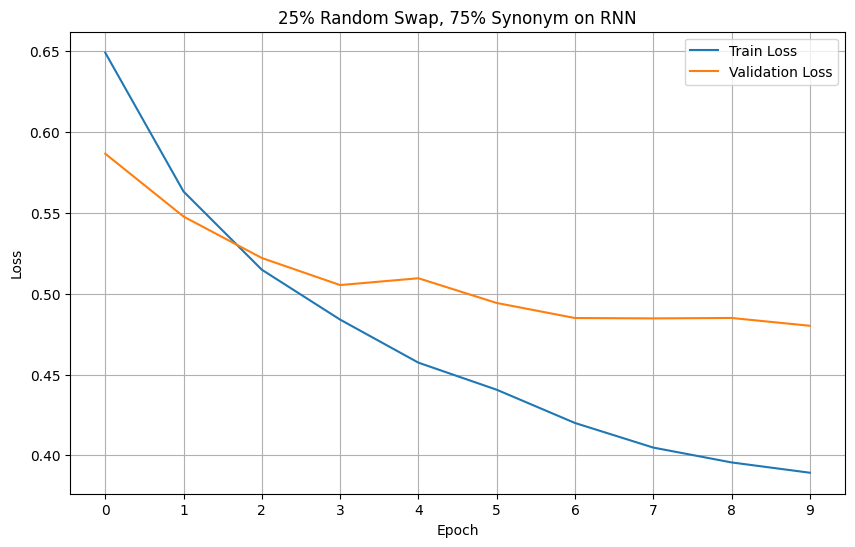

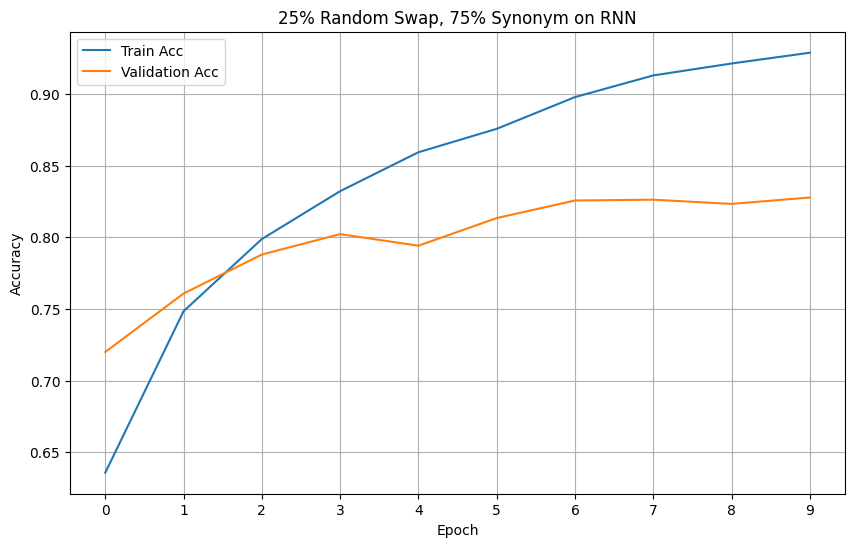

In [15]:
# Plot the loss graph
pipeline_augmented.plot_loss(title="25% Random Swap, 75% Synonym on RNN")
pipeline_augmented.plot_acc(title="25% Random Swap, 75% Synonym on RNN")

### LSTM

In [16]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_augmented_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/17050 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/13640 [00:00<?, ? examples/s]

Map:   0%|          | 0/3410 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]


Epoch: 1/10
Train Loss: 0.653, Train Acc: 0.608
Valid Loss: 0.598, Valid Acc: 0.693


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


Epoch: 2/10
Train Loss: 0.551, Train Acc: 0.748
Valid Loss: 0.538, Valid Acc: 0.757


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


Epoch: 3/10
Train Loss: 0.503, Train Acc: 0.802
Valid Loss: 0.520, Valid Acc: 0.781


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


Epoch: 4/10
Train Loss: 0.481, Train Acc: 0.827
Valid Loss: 0.514, Valid Acc: 0.788


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.65it/s]


Epoch: 5/10
Train Loss: 0.456, Train Acc: 0.853
Valid Loss: 0.499, Valid Acc: 0.807


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]


Epoch: 6/10
Train Loss: 0.450, Train Acc: 0.861
Valid Loss: 0.504, Valid Acc: 0.805


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]


Epoch: 7/10
Train Loss: 0.432, Train Acc: 0.880
Valid Loss: 0.492, Valid Acc: 0.815


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.55it/s]


Epoch: 8/10
Train Loss: 0.424, Train Acc: 0.888
Valid Loss: 0.497, Valid Acc: 0.812


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]


Epoch: 9/10
Train Loss: 0.416, Train Acc: 0.897
Valid Loss: 0.491, Valid Acc: 0.819


evaluating...: 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

Epoch: 10/10
Train Loss: 0.409, Train Acc: 0.904
Valid Loss: 0.486, Valid Acc: 0.823


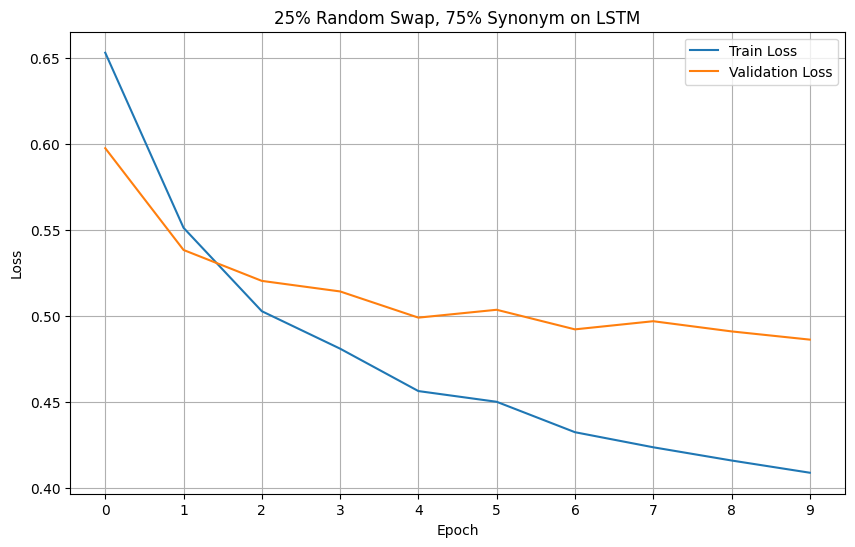

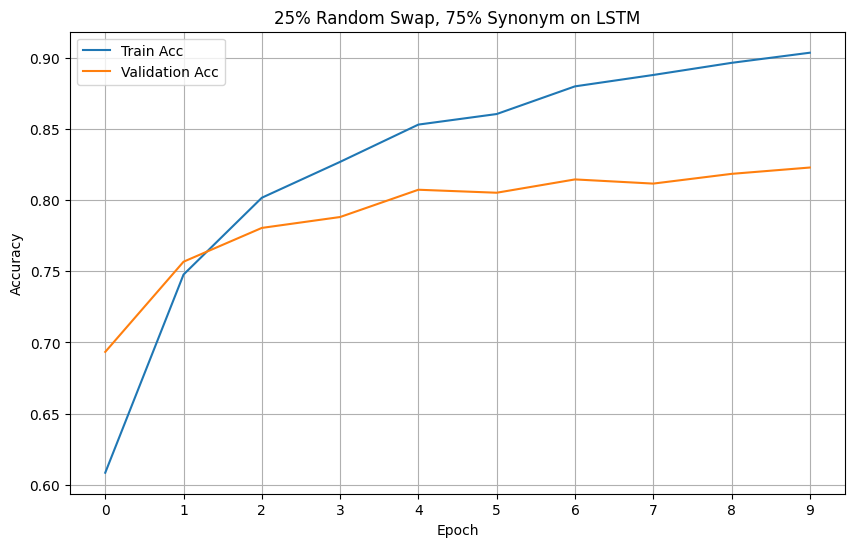

In [17]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss(title="25% Random Swap, 75% Synonym on LSTM")
pipeline_augmented_LSTM.plot_acc(title="25% Random Swap, 75% Synonym on LSTM")

____

## Performance of 100% Random Substitute, 50% Synonym (Total 150%)

In [18]:
# Augment and increase size by 100%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 1.0,          # 50% of data for random augmentation
    MODE.SYNONYM.WORDNET: 0.5,         # 50% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 50% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 50% augmentation: 21316


### RNN Max Pooling

In [19]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/21316 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/4264 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [20]:
pipeline_augmented.train_model(n_epochs=10)

evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.71it/s]


Epoch: 1/10
Train Loss: 0.630, Train Acc: 0.671
Valid Loss: 0.563, Valid Acc: 0.752


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  7.02it/s]


Epoch: 2/10
Train Loss: 0.533, Train Acc: 0.779
Valid Loss: 0.541, Valid Acc: 0.765


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.75it/s]


Epoch: 3/10
Train Loss: 0.491, Train Acc: 0.823
Valid Loss: 0.503, Valid Acc: 0.805


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.19it/s]


Epoch: 4/10
Train Loss: 0.461, Train Acc: 0.854
Valid Loss: 0.485, Valid Acc: 0.823


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.89it/s]


Epoch: 5/10
Train Loss: 0.433, Train Acc: 0.883
Valid Loss: 0.468, Valid Acc: 0.843


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.70it/s]


Epoch: 6/10
Train Loss: 0.414, Train Acc: 0.904
Valid Loss: 0.455, Valid Acc: 0.858


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.76it/s]


Epoch: 7/10
Train Loss: 0.406, Train Acc: 0.910
Valid Loss: 0.471, Valid Acc: 0.840


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.77it/s]


Epoch: 8/10
Train Loss: 0.399, Train Acc: 0.918
Valid Loss: 0.455, Valid Acc: 0.858


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.13it/s]


Epoch: 9/10
Train Loss: 0.389, Train Acc: 0.928
Valid Loss: 0.440, Valid Acc: 0.872


evaluating...: 100%|██████████| 9/9 [00:01<00:00,  6.53it/s]

Epoch: 10/10
Train Loss: 0.380, Train Acc: 0.936
Valid Loss: 0.436, Valid Acc: 0.876


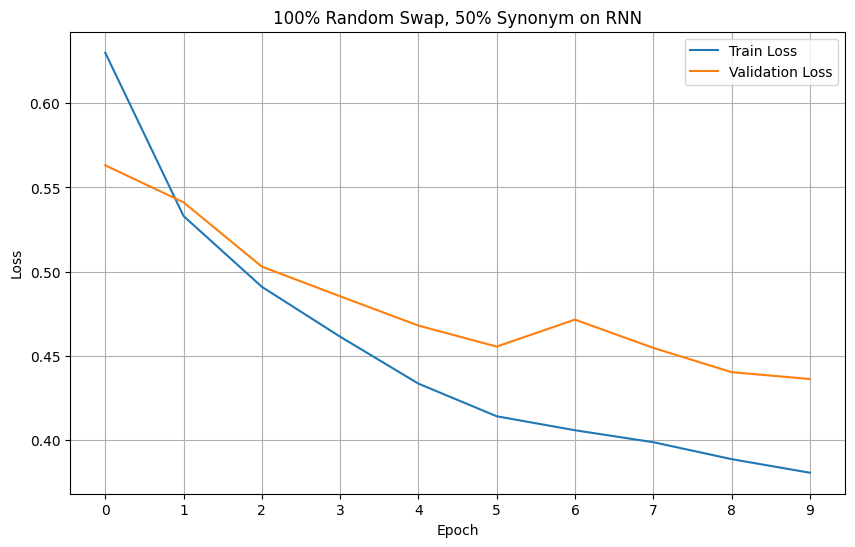

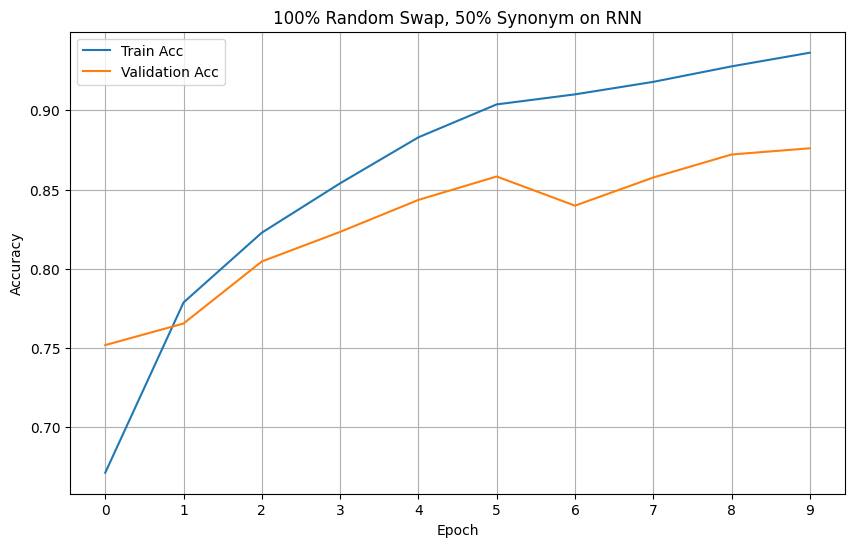

In [21]:
# Plot the loss graph
pipeline_augmented.plot_loss(title="100% Random Swap, 50% Synonym on RNN")
pipeline_augmented.plot_acc(title="100% Random Swap, 50% Synonym on RNN")


### LSTM

In [22]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)

Map:   0%|          | 0/21316 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/17052 [00:00<?, ? examples/s]

Map:   0%|          | 0/4264 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [23]:
pipeline_augmented_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]


Epoch: 1/10
Train Loss: 0.656, Train Acc: 0.609
Valid Loss: 0.569, Valid Acc: 0.740


evaluating...: 100%|██████████| 9/9 [00:04<00:00,  2.19it/s]


Epoch: 2/10
Train Loss: 0.553, Train Acc: 0.757
Valid Loss: 0.565, Valid Acc: 0.746


evaluating...: 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


Epoch: 3/10
Train Loss: 0.744, Train Acc: 0.567
Valid Loss: 0.827, Valid Acc: 0.485


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]


Epoch: 4/10
Train Loss: 0.797, Train Acc: 0.506
Valid Loss: 0.708, Valid Acc: 0.486


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.31it/s]


Epoch: 5/10
Train Loss: 0.694, Train Acc: 0.493
Valid Loss: 0.692, Valid Acc: 0.512


evaluating...: 100%|██████████| 9/9 [00:04<00:00,  2.20it/s]


Epoch: 6/10
Train Loss: 0.692, Train Acc: 0.491
Valid Loss: 0.692, Valid Acc: 0.513


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.30it/s]


Epoch: 7/10
Train Loss: 0.692, Train Acc: 0.492
Valid Loss: 0.692, Valid Acc: 0.513


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]


Epoch: 8/10
Train Loss: 0.692, Train Acc: 0.493
Valid Loss: 0.691, Valid Acc: 0.514


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.33it/s]


Epoch: 9/10
Train Loss: 0.690, Train Acc: 0.497
Valid Loss: 0.687, Valid Acc: 0.518


evaluating...: 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

Epoch: 10/10
Train Loss: 0.673, Train Acc: 0.497
Valid Loss: 0.647, Valid Acc: 0.520


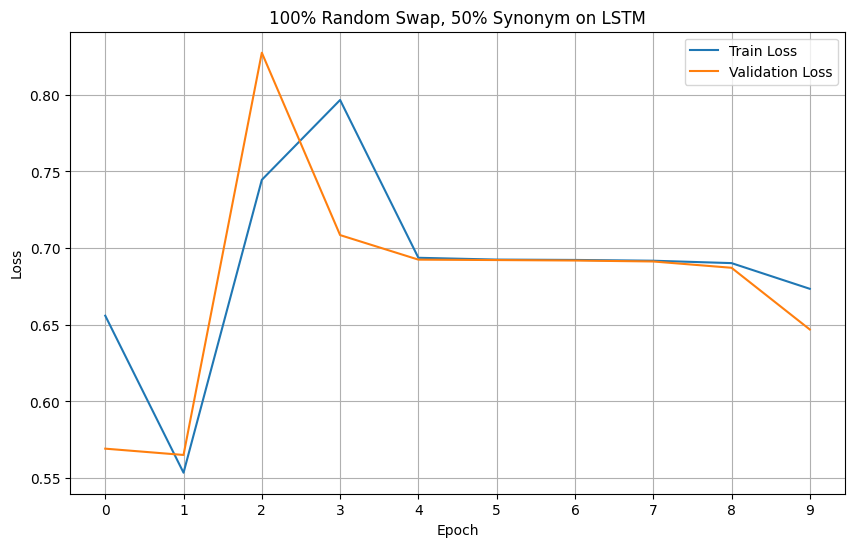

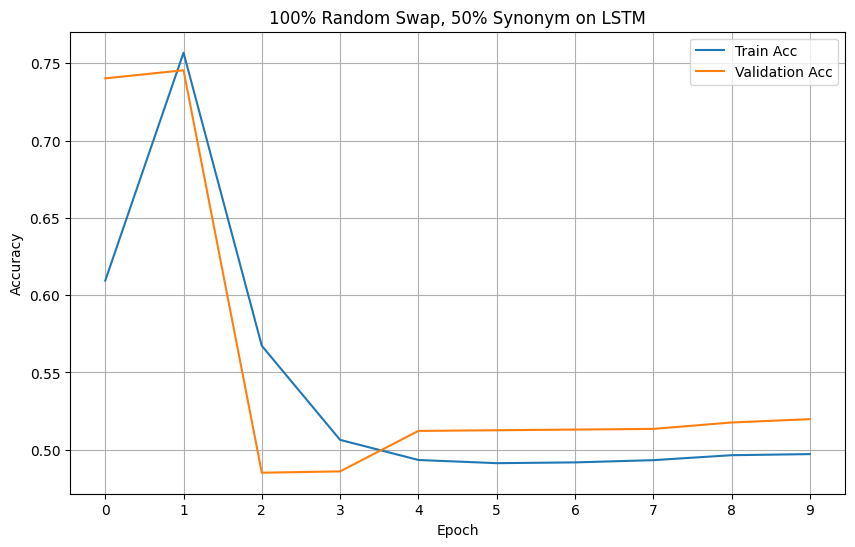

In [24]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss(title="100% Random Swap, 50% Synonym on LSTM")
pipeline_augmented_LSTM.plot_acc(title="100% Random Swap, 50% Synonym on LSTM")

## Performance of 100% Random Substitute, 100% Synonym (Total 200%)

In [25]:
# Augment and increase size by 200%
percentages = {
    MODE.RANDOM.SUBSTITUTE: 1.00,          # 100% of data for random augmentation
    MODE.SYNONYM.WORDNET: 1.00,         # 100% of data for synonym augmentation
}

augmented_data_list = augment_data(original_train_data, percentages)


# Convert augmented data into Datasets
augmented_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_data_list],
    "label": [item["label"] for item in augmented_data_list]
}, features=features)

# Concatenate original and augmented datasets
augmented_train_data = concatenate_datasets([original_train_data, augmented_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 200% augmentation: {len(augmented_train_data)}")

Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Skipping augmentation for text due to error: Sample larger than population or is negative
Original train size: 8530
Train size after 200% augmentation: 25580


### RNN Max Pooling

In [26]:
pipeline_augmented= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_augmented.train_model(n_epochs=10)

Map:   0%|          | 0/25580 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20464 [00:00<?, ? examples/s]

Map:   0%|          | 0/5116 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Epoch: 1/10
Train Loss: 0.630, Train Acc: 0.674
Valid Loss: 0.568, Valid Acc: 0.743


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.65it/s]


Epoch: 2/10
Train Loss: 0.532, Train Acc: 0.778
Valid Loss: 0.514, Valid Acc: 0.798


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.16it/s]


Epoch: 3/10
Train Loss: 0.480, Train Acc: 0.833
Valid Loss: 0.488, Valid Acc: 0.823


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.55it/s]


Epoch: 4/10
Train Loss: 0.448, Train Acc: 0.866
Valid Loss: 0.466, Valid Acc: 0.847


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.49it/s]


Epoch: 5/10
Train Loss: 0.424, Train Acc: 0.893
Valid Loss: 0.453, Valid Acc: 0.861


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.40it/s]


Epoch: 6/10
Train Loss: 0.404, Train Acc: 0.914
Valid Loss: 0.442, Valid Acc: 0.871


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.47it/s]


Epoch: 7/10
Train Loss: 0.388, Train Acc: 0.930
Valid Loss: 0.433, Valid Acc: 0.883


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.54it/s]


Epoch: 8/10
Train Loss: 0.380, Train Acc: 0.937
Valid Loss: 0.428, Valid Acc: 0.887


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  6.56it/s]


Epoch: 9/10
Train Loss: 0.372, Train Acc: 0.945
Valid Loss: 0.424, Valid Acc: 0.892


evaluating...: 100%|██████████| 10/10 [00:01<00:00,  5.31it/s]


Epoch: 10/10
Train Loss: 0.367, Train Acc: 0.950
Valid Loss: 0.420, Valid Acc: 0.895


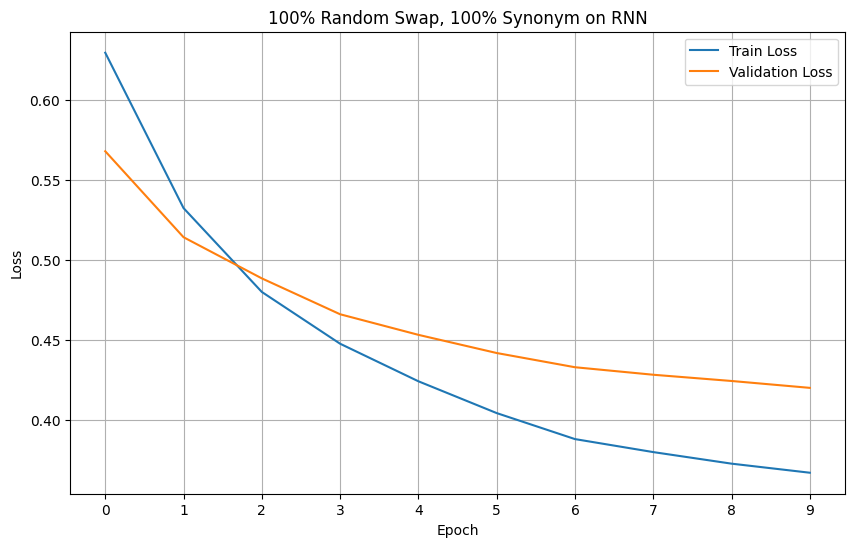

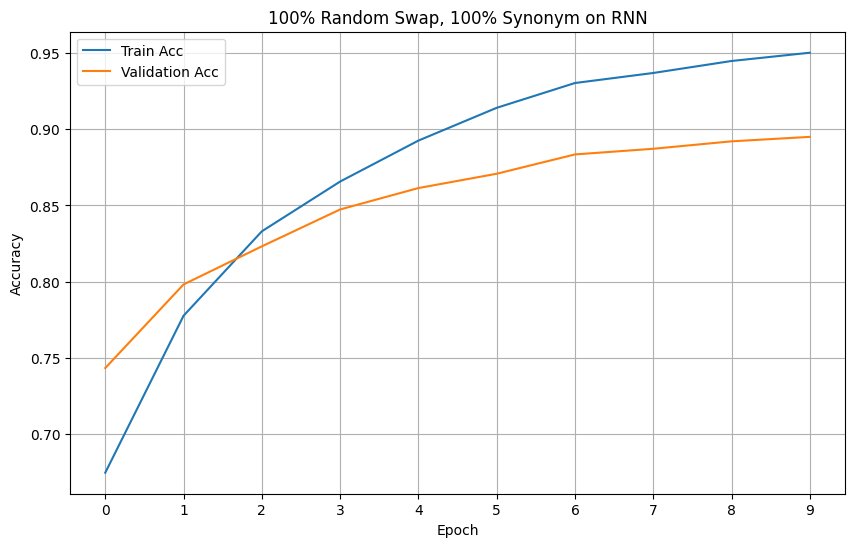

In [27]:
# Plot the loss graph
pipeline_augmented.plot_loss(title="100% Random Swap, 100% Synonym on RNN")
pipeline_augmented.plot_acc(title="100% Random Swap, 100% Synonym on RNN")

### LSTM

In [28]:
pipeline_augmented_LSTM= TextClassificationPipeline(
    augmented_data=augmented_train_data, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_augmented_LSTM.train_model(n_epochs=10)

Map:   0%|          | 0/25580 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/20464 [00:00<?, ? examples/s]

Map:   0%|          | 0/5116 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


Epoch: 1/10
Train Loss: 0.623, Train Acc: 0.658
Valid Loss: 0.552, Valid Acc: 0.749


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.20it/s]


Epoch: 2/10
Train Loss: 0.519, Train Acc: 0.787
Valid Loss: 0.515, Valid Acc: 0.790


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]


Epoch: 3/10
Train Loss: 0.474, Train Acc: 0.835
Valid Loss: 0.500, Valid Acc: 0.808


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.10it/s]


Epoch: 4/10
Train Loss: 0.467, Train Acc: 0.844
Valid Loss: 0.524, Valid Acc: 0.788


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.14it/s]


Epoch: 5/10
Train Loss: 0.483, Train Acc: 0.826
Valid Loss: 0.523, Valid Acc: 0.790


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.03it/s]


Epoch: 6/10
Train Loss: 0.622, Train Acc: 0.691
Valid Loss: 0.808, Valid Acc: 0.505


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.19it/s]


Epoch: 7/10
Train Loss: 0.654, Train Acc: 0.658
Valid Loss: 0.511, Valid Acc: 0.797


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]


Epoch: 8/10
Train Loss: 0.456, Train Acc: 0.855
Valid Loss: 0.493, Valid Acc: 0.816


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.13it/s]


Epoch: 9/10
Train Loss: 0.433, Train Acc: 0.878
Valid Loss: 0.484, Valid Acc: 0.825


evaluating...: 100%|██████████| 10/10 [00:04<00:00,  2.21it/s]

Epoch: 10/10
Train Loss: 0.419, Train Acc: 0.892
Valid Loss: 0.481, Valid Acc: 0.829


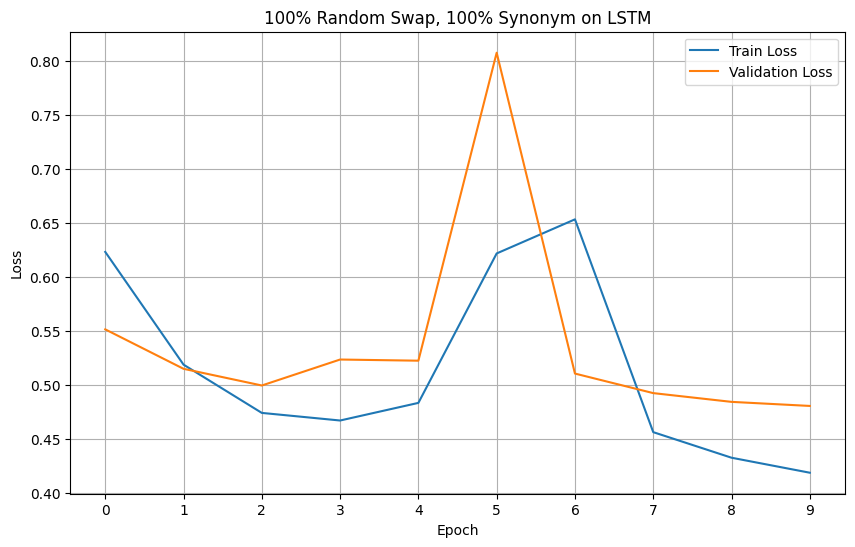

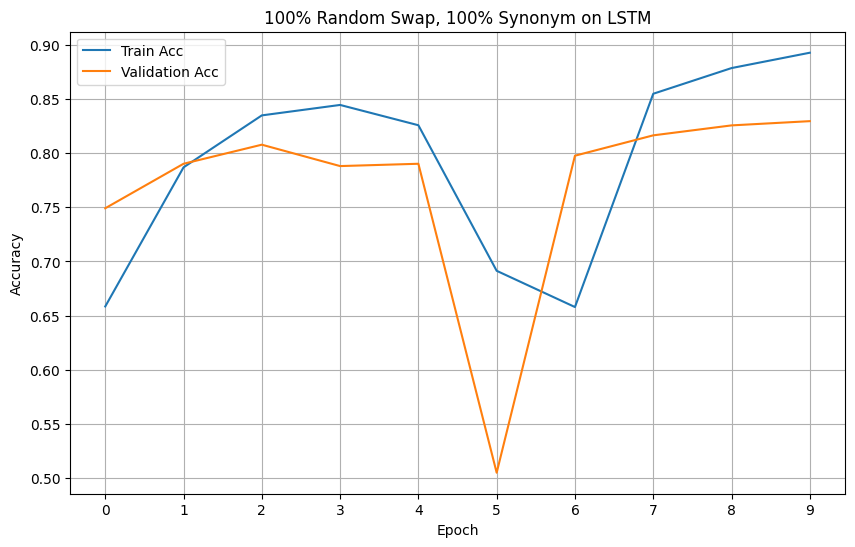

In [29]:
# Plot the loss graph
pipeline_augmented_LSTM.plot_loss(title="100% Random Swap, 100% Synonym on LSTM")
pipeline_augmented_LSTM.plot_acc(title="100% Random Swap, 100% Synonym on LSTM")

____